<p align="center">
  <img src="https://maua.br/images/logo-IMT.png" width="250">
</p>


<div align="center">

# 💻 ECM797: Introdução à Computação Quântica  
### Prof. Sandro Martini  
## Semana 11: Qiskit — Portas Quânticas de 1 Qubit  

</div>


## 📝 Nome do(a) estudante:


<div align="center" style="color: red;">
  <strong>⚠️ LEIA TODO O NOTEBOOK ANTES DE REALIZAR AS TAREFAS INDICADAS ⚠️</strong>
</div>

## 🎯 Objetivos da Semana

Nesta atividade, você irá:

- Conhecer e aplicar portas quânticas de 1 qubit no Qiskit.
- Visualizar seus efeitos na Esfera de Bloch.
- Simular medições e interpretar os resultados.


## ⚙️ Preliminares


### 1. Qiskit Aer

O **Qiskit Aer** é o simulador do Qiskit — ele permite executar circuitos quânticos em um ambiente virtual. Isso é essencial para:

- Testar e depurar circuitos antes de rodar em hardwares reais.
- Reproduzir resultados com alto número de execuções (_shots_).
- Observar o comportamento ideal dos circuitos sem ruído físico.

Assim, você poderá explorar os efeitos das portas quânticas com mais controle.


#### 1.1 Instalando o Aer

In [218]:
pip install qiskit-aer

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


> ⚠️ Após instalar, vá em **Kernel > Restart & Clear Output** para garantir que o pacote seja carregado corretamente.


### 🌐 2. Esfera de Bloch — Representando Qubits

Um **qubit** é como um bit clássico — mas com "superpoderes". Enquanto um bit clássico pode estar em apenas um dos estados (0 ou 1), um qubit pode estar em uma **superposição** de ∣0⟩ e ∣1⟩.

Para visualizar isso, usamos a **Esfera de Bloch**:

- **∣0⟩** → Polo norte da esfera  
- **∣1⟩** → Polo sul  
- Qualquer outro estado → Um ponto na superfície da esfera

A Esfera de Bloch nos permite ver como as portas quânticas “girando” o estado do qubit em diferentes direções.


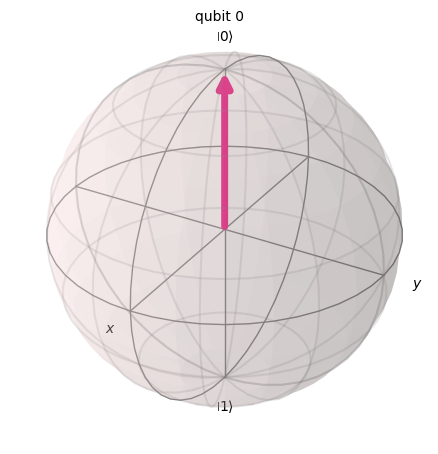

In [219]:
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector

# Estado |0⟩ (polo norte)
state = Statevector.from_label('0')
plot_bloch_multivector(state)


#### 📐 2.1 Representação Matemática do Estado de um Qubit


O estado quântico mais geral de um qubit é uma combinação dos estados ∣0⟩ e ∣1⟩, com dois parâmetros angulares:

$$
|\psi\rangle = \cos\left(\frac{\theta}{2}\right)|0\rangle + e^{i\phi} \sin\left(\frac{\theta}{2}\right)|1\rangle
$$

onde:

- **θ (theta)** é o ângulo polar, de 0 a π — controla a “altura” do vetor na esfera.  
- **φ (phi)** é o ângulo azimutal, de 0 a 2π — controla a “rotação” ao redor do eixo vertical.

Esses dois ângulos definem completamente a posição do vetor de estado na superfície da Esfera de Bloch.



#### 🔍 2.2 Interpretação Física

A fórmula anterior mostra que qualquer estado de qubit pode ser representado por dois ângulos — **θ** e **φ** — posicionando o vetor de estado em um ponto na superfície da Esfera de Bloch.

- Um **estado puro** sempre está sobre a superfície da esfera.
- O eixo Z representa os estados ∣0⟩ (no topo) e ∣1⟩ (na base).
- O equador da esfera representa superposições balanceadas (como ∣+⟩ e ∣−⟩).
- Portas quânticas **rotacionam esse vetor** sobre a esfera — o que nos permite **visualizar e prever seus efeitos**.

Essa interpretação será essencial para as próximas simulações!


#### 🎯 2.3 Exemplo: Visualizando um Estado Arbitrário

Vamos agora visualizar um exemplo de estado quântico qualquer, com coeficientes complexos. Observe como o vetor é descrito matematicamente e, depois, veja como ele aparece na esfera de Bloch.


In [220]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

v = Statevector([(1 + 2.0j) / 3, -2 / 3])
display(v.draw("latex"))

<IPython.core.display.Latex object>

Agora podemos representar esse estado na Esfera de Bloch usando o comando `plot_bloch_multivector`, que desenha o vetor correspondente ao estado quântico.


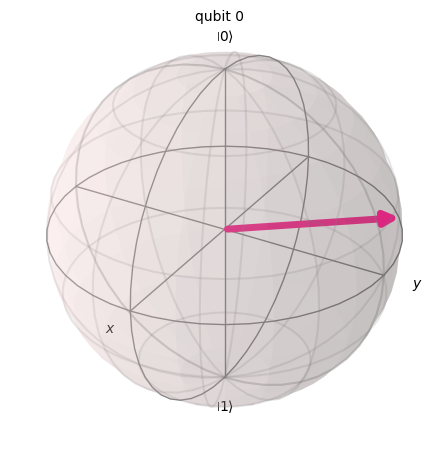

In [221]:
from qiskit.visualization import plot_bloch_multivector

state = Statevector(v)
plot_bloch_multivector(state)

> 💬 **Interprete:** Esse estado está mais próximo de ∣0⟩ ou ∣1⟩? O vetor aponta mais para o norte, o sul ou o equador da esfera?


> 🧭 O vetor vermelho indica a direção do estado quântico na esfera. Quanto mais próximo do topo (eixo Z positivo), mais próximo o estado está de ∣0⟩.


### 3. Guia passo a passo para a implementação de uma porta quântica usando o Qiskit

Comecemos pela importação das seguintes bibliotecas básicas:

In [222]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

Em seguida, usando a função `QuantumCircuit`, criamos o circuito com 1 qubit e 1 bit clássico para medição:

In [223]:
qc = QuantumCircuit(1,1)

`QuantumCircuit(num_qubits, num_classical_bits)`

**num_qubits:** O primeiro argumento (neste caso, 1) especifica o número de qubits no circuito. Um qubit é a unidade básica de informação quântica, o equivalente quântico de um bit em computação clássica.

**num_classical_bits:** O segundo argumento (também 1 neste exemplo) indica o número de bits clássicos no circuito. Bits clássicos são usados para armazenar os resultados das medições feitas nos qubits. Medir um qubit colapsa seu estado quântico em um dos estados básicos, e esse resultado é então registrado em um bit clássico$^{(1)}$.

$^{(1)}$Elemento importante na construção do circuito quântico é a definição do conjunto de bits clássicos onde registramos a informação oriunda das medidas realizadas nos qubits após a execução de algum algoritmo, por exemplo.

**OBSERVAÇÃO**: é perfeitamente possível criar um circuito quântico no Qiskit sem definir bits clássicos. A inclusão de bits clássicos no `QuantumCircuit` é opcional e depende do objetivo do seu circuito. Se você pretende realizar medições e quer registrar os resultados dessas medições, você precisará de bits clássicos. No entanto, se o seu objetivo é apenas manipular estados quânticos ou realizar simulações onde as medições não são necessárias para serem visualizadas ou onde os estados finais serão apenas utilizados internamente, então você pode omitir os bits clássicos. Use o comando `QuantumCircuit(1)` para criar um circuito com um único qubit e sem bit clássico.

#### 3.1 Visualização do estado quântico na esfera de Bloch (antes da aplicação da porta)

A figura abaixo mostra o estado do qubit de índice 0:

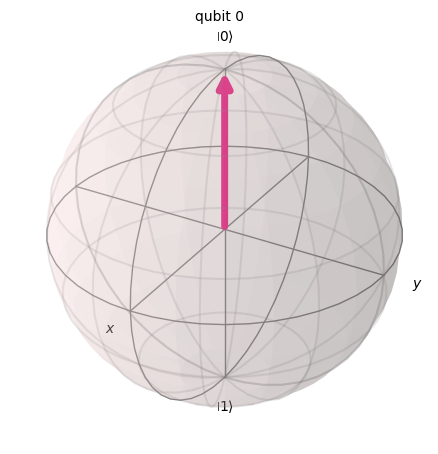

In [224]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

state = Statevector(qc)
plot_bloch_multivector(state)

**OBSERVAÇÃO**:  Quando dizemos "qubit 0" em termos de programação em Qiskit (ou qualquer outra plataforma de computação quântica), estamos nos referindo ao primeiro qubit no circuito, determinado pelo índice 0. Este é um identificador posicional, não um estado. O estado de um qubit, por outro lado, refere-se à sua condição quântica, que pode ser ∣0⟩ ou ∣1⟩ (ou uma superposição de ambos). **Inicialmente, por padrão, todos os qubits em um circuito Qiskit são preparados no estado ∣0⟩, a menos que especificado de outra forma.**

#### 3.2 Porta quântica de 1-Qubit

A seguir, utilizaremos a porta X (NOT quântica) como nosso primeiro exemplo:

Circuito com a porta X aplicada no qubit 0:


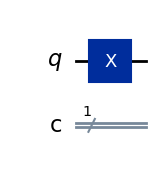

In [225]:
# Aplica a porta X (NOT quântica) no qubit 0
qc.x(0)

# Desenho do circuito
print("Circuito com a porta X aplicada no qubit 0:")
display(qc.draw('mpl'))


**OBSERVAÇÃO**: O símbolo **C 1/══════╩═** mostra o bit clássico onde o resultado da medição será armazenado.

#### 3.3 Visualização do estado quântico na esfera de Bloch (depois da aplicação da porta)

A figura abaixo mostra o estado do qubit de índice 0 depois da aplicação da porta X:

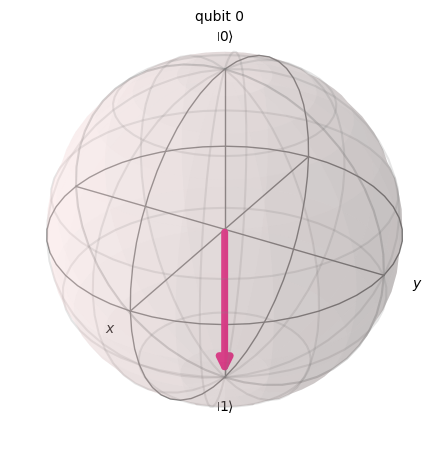

In [226]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
 
state = Statevector(qc)
plot_bloch_multivector(state)

#### 3.4 Medição do estado

Agora realizaremos a medida e o armazenamento desse resulado num bit clássico usando o comando `circuit.measure(qubit_index, bit_index)`:

**circuit.measure(qubit_index, bit_index)**

**circuit**: Refere-se ao objeto QuantumCircuit que contém o circuito quântico que está sendo usado.  

**measure**: É o método usado para medir o estado de um qubit.  

**qubit_index**: O primeiro argumento indica o índice do qubit que será medido. Neste caso, 0 indica que o qubit a ser medido é o qubit de índice 0 (o primeiro qubit do circuito).  

**bit_index**: O segundo argumento especifica o índice do bit clássico onde o resultado da medição será armazenado. Aqui, 0 indica que o resultado da medição do qubit 0 será armazenado no bit clássico de índice 0.

Circuito:


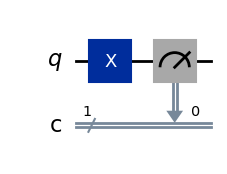

In [227]:
# Medição do qubit 0 no bit clássico 0
qc.measure(0, 0)

# Desenho do circuito
print("Circuito:")
display(qc.draw('mpl'))


**OBSERVAÇÃO**: O símbolo **C 1/══════╩═ 0** mostra o bit clássico onde o resultado da medição é armazenado (o índice 0 do array de bits clássicos).

#### 3.5  Inicializando o simulador Aer

Permite a execução de circuitos completos que incluem diversas portas quânticas e medições:

In [228]:
simulator = Aer.get_backend('aer_simulator')

#### 3.6  Execução e resulatdo da medida

Contagens: {'1': 1500}


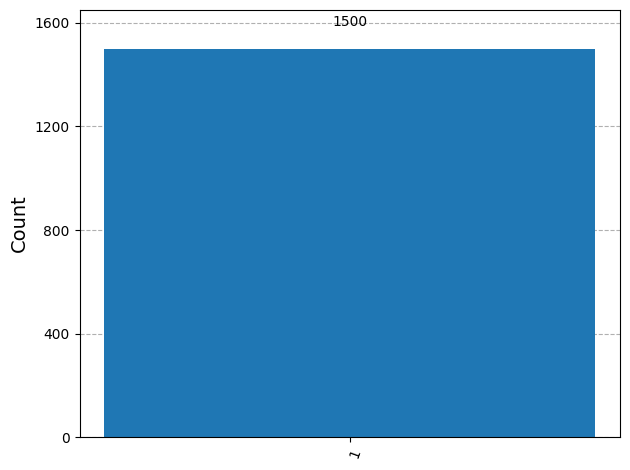

In [229]:
# Execução do circuito
job = simulator.run(qc, shots=1500)
result = job.result()

# Contagens das saídas
counts = result.get_counts(qc)
print("Contagens:", counts)

# Plotagem do histograma das contagens
from qiskit.visualization import plot_histogram
plot_histogram(counts)

<div class="alert alert-success"> <strong> &#x1F4DD; Atividades:</strong> Construa os circuitos quânticos conforme especificado, utilizando as portas de 1-qubit disponíveis. Para cada circuito, ilustre o estado quântico na Esfera de Bloch conforme indicado. Após montar os circuitos, realize 1000 execuções (shots) de cada um e visualize os resultados através de um histograma. Finalmente, analise e discuta como as portas quânticas influenciam o estado quântico.

##  **<center><span style="color: red;">ANTES DE EXECUTAR AS TAREFAS, LEIA TODO O NOTEBOOK!</span><center>**

<div class="alert alert-success"> <strong> &#x1F4DD; Atividade 1:</strong> Visualize o estado na Esfera de Bloch após a aplicação da porta de Hadamard. Explique o impacto dessa porta no estado inicial do qubit. Em seguida, proceda com a execução do circuito. ATENÇÃO: o código abaixo apenas ilustra o circuito quântico. Para executá-lo e analisá-lo, siga as instruções fornecidas anteriormente.

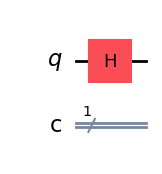

In [230]:
from qiskit import QuantumCircuit
circuito = QuantumCircuit(1,1)  
# Aplica diversas portas
circuito.h(0)  # Hadamard
display(circuito.draw('mpl'))

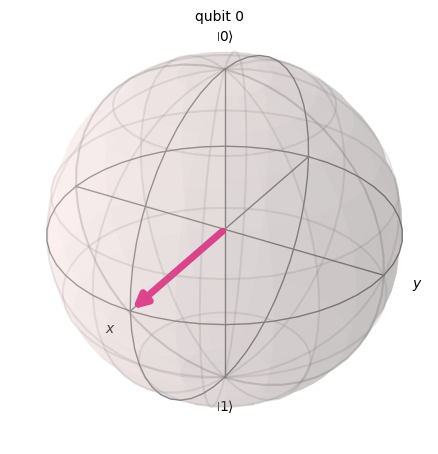

In [231]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
 
state = Statevector(circuito)
plot_bloch_multivector(state)

Circuito:


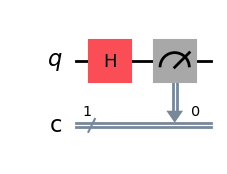

In [232]:
# Medição do qubit 0 no bit clássico 0
circuito.measure(0, 0)

# Desenho do circuito
print("Circuito:")
display(circuito.draw('mpl'))

In [233]:
simulator1 = Aer.get_backend('qasm_simulator')
job = simulator1.run(circuito, shots=1000)
counts = job.result().get_counts()

print("Contagens:", counts)

Contagens: {'1': 478, '0': 522}


**coloque aqui suas conclusões**

Após a aplicação da porta, o vetor migra para o eixo X em seu lado positivo, dividindo as medições em aproximadamente 50% para cada estado. 

<div class="alert alert-success"> <strong> &#x1F4DD; Atividade 2:</strong> Visualize o estado na Esfera de Bloch após a aplicação da porta Y. Explique o impacto dessa porta. Em seguida, proceda com a execução do circuito. ATENÇÃO: o código abaixo apenas ilustra o circuito quântico. Para executá-lo e analisá-lo, siga as instruções fornecidas anteriormente.

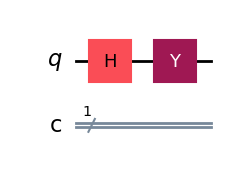

In [234]:
from qiskit import QuantumCircuit
circuito2 = QuantumCircuit(1,1)  
# Aplica diversas portas
circuito2.h(0)  # Hadamard
circuito2.y(0)
display(circuito2.draw('mpl'))

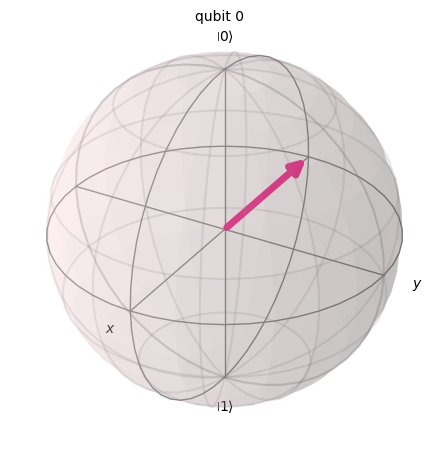

In [235]:
#Coloque seu código aqui
state2 = Statevector(circuito2)
plot_bloch_multivector(state2)

Circuito:


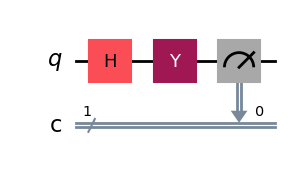

In [236]:
# Medição do qubit 0 no bit clássico 0
circuito2.measure(0, 0)

# Desenho do circuito
print("Circuito:")
display(circuito2.draw('mpl'))

In [237]:
simulator2 = Aer.get_backend('qasm_simulator')
job2 = simulator2.run(circuito2, shots=1000)
counts2 = job2.result().get_counts()

print("Contagens:", counts2)

Contagens: {'0': 511, '1': 489}


**coloque aqui suas conclusões**

Após a aplicação da porta Y, o vetor muda para o lado Negativo do eixo X, e continua dividindo as medições em aproximadamente 50% para cada estado.

<div class="alert alert-success"> <strong> &#x1F4DD; Atividade 3:</strong> Visualize o estado na Esfera de Bloch após a aplicação da porta Z. Explique o impacto dessa porta. Em seguida, proceda com a execução do circuito. ATENÇÃO: o código abaixo apenas ilustra circuito quântico. Para executá-lo e analisá-lo, siga as instruções fornecidas anteriormente.

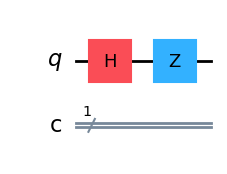

In [238]:
from qiskit import QuantumCircuit
circuito3 = QuantumCircuit(1,1)  
# Aplica diversas portas
circuito3.h(0)  # Hadamard
circuito3.z(0)
display(circuito3.draw('mpl'))

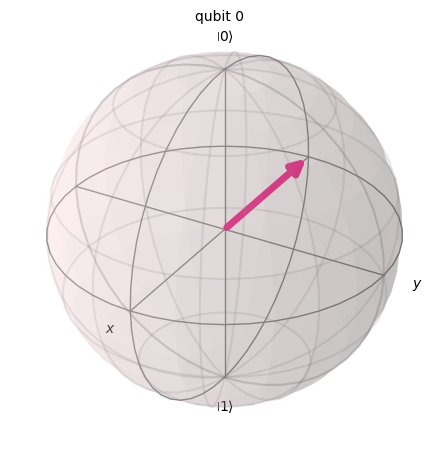

In [239]:
#Coloque seu código aqui
state3 = Statevector(circuito3)
plot_bloch_multivector(state3)

Circuito:


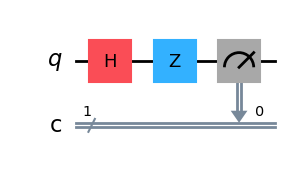

In [240]:
# Medição do qubit 0 no bit clássico 0
circuito3.measure(0, 0)

# Desenho do circuito
print("Circuito:")
display(circuito3.draw('mpl'))

In [241]:
simulator3 = Aer.get_backend('qasm_simulator')
job3 = simulator3.run(circuito3, shots=1000)
counts3 = job3.result().get_counts()
print("Contagens:", counts3)

Contagens: {'1': 520, '0': 480}


**coloque aqui suas conclusões**

Nessa caso, a porta Z teve um comportamente igual ao da porta Y, mudando o vetor para o lado Negativo do eixo X, as medições continuam em aproximadamente 50% , mas com uma variação levemente maior

<div class="alert alert-success"> <strong> &#x1F4DD; Atividade 4:</strong> Visualize o estado na Esfera de Bloch após a aplicação da porta de fase S. Explique o impacto dessa porta. Em seguida, proceda com a execução do circuito. ATENÇÃO: o código abaixo apenas ilustra circuito quântico. Para executá-lo e analisá-lo, siga as instruções fornecidas anteriormente.

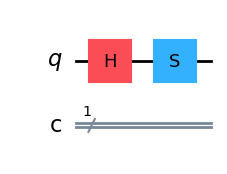

In [242]:
from qiskit import QuantumCircuit
circuito4 = QuantumCircuit(1,1)  
# Aplica diversas portas
circuito4.h(0)  # Hadamard
circuito4.s(0)
display(circuito4.draw('mpl'))

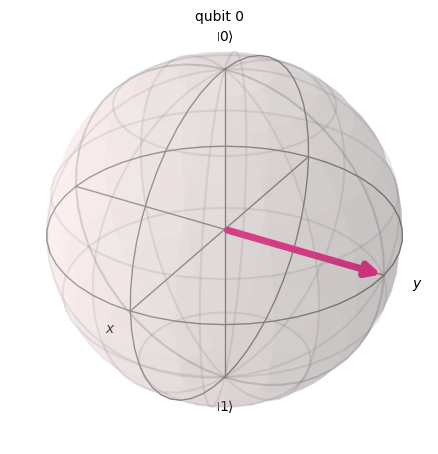

In [243]:
#Coloque seu código aqui
state4 = Statevector(circuito4)
plot_bloch_multivector(state4)

Circuito:


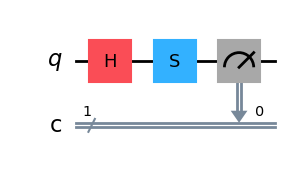

In [244]:
# Medição do qubit 0 no bit clássico 0
circuito4.measure(0, 0)

# Desenho do circuito
print("Circuito:")
display(circuito4.draw('mpl'))

In [245]:
simulator4 = Aer.get_backend('qasm_simulator')
job4 = simulator4.run(circuito4, shots=1000)
counts4 = job4.result().get_counts()
print("Contagens:", counts4)

Contagens: {'0': 508, '1': 492}


**coloque aqui suas conclusões**

Com a aplicação da porta S, o vetor se desloca em 90° para o eixo Y no lado positivo, as medições continuam em aproximadamente 50% para cada estado.

<div class="alert alert-success"> <strong> &#x1F4DD; Atividade 5:</strong> Visualize o estado na Esfera de Bloch após a aplicação da porta de fase T. Explique o impacto dessa porta. Em seguida, proceda com a execução do circuito. ATENÇÃO: o código abaixo apenas ilustra circuito quântico. Para executá-lo e analisá-lo, siga as instruções fornecidas anteriormente.

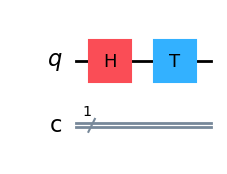

In [246]:
from qiskit import QuantumCircuit
circuito5 = QuantumCircuit(1,1)  
# Aplica diversas portas
circuito5.h(0)  # Hadamard
circuito5.t(0)
display(circuito5.draw('mpl'))

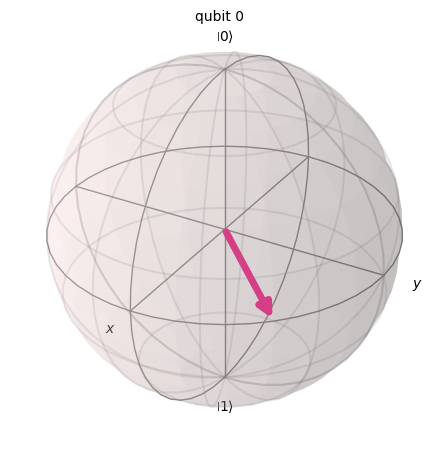

In [247]:
#Coloque seu código aqui
state5 = Statevector(circuito5)
plot_bloch_multivector(state5)

Circuito:


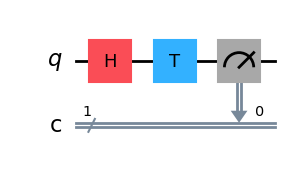

In [248]:
# Medição do qubit 0 no bit clássico 0
circuito5.measure(0, 0)

# Desenho do circuito
print("Circuito:")
display(circuito5.draw('mpl'))

In [249]:
simulator5 = Aer.get_backend('qasm_simulator')
job5 = simulator5.run(circuito5, shots=1000)
counts5 = job5.result().get_counts()
print("Contagens:", counts5)

Contagens: {'0': 541, '1': 459}


**coloque aqui suas conclusões**

O vetor se deslocou em 45° para o eixo Y no lado positivo, as medições continuam em aproximadamente 50% para cada estado, mas com uma variação maior

<div class="alert alert-success"> <strong> &#x1F4DD; Atividade 6:</strong> Visualize o estado na Esfera de Bloch após a aplicação da porta de rotação RX. Explique o impacto dessa porta. Em seguida, proceda com a execução do circuito. ATENÇÃO: o código abaixo apenas ilustra circuito quântico. Para executá-lo e analisá-lo, siga as instruções fornecidas anteriormente.

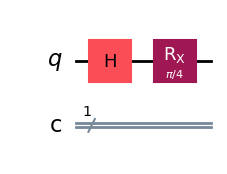

In [250]:
from qiskit import QuantumCircuit
import numpy as np
circuito6 = QuantumCircuit(1,1)  
# Aplica diversas portas
circuito6.h(0)  # Hadamard

#Aqui voce pode alterar o rotação no primeiro valor do argumento

circuito6.rx(np.pi/4,0)
display(circuito6.draw('mpl'))

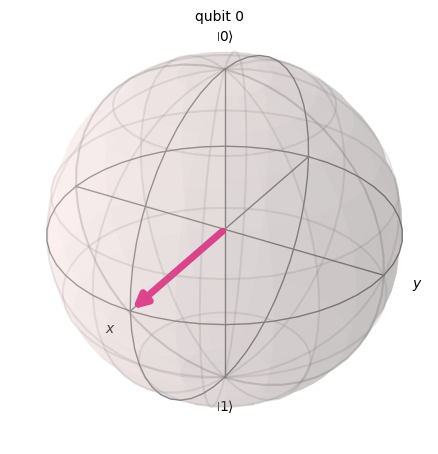

In [251]:
#Coloque seu código aqui
state6 = Statevector(circuito6)
plot_bloch_multivector(state6)

Circuito:


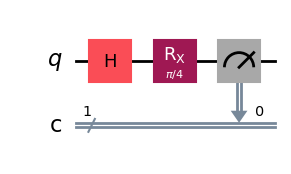

In [252]:
# Medição do qubit 0 no bit clássico 0
circuito6.measure(0, 0)

# Desenho do circuito
print("Circuito:")
display(circuito6.draw('mpl'))

In [253]:
simulator6 = Aer.get_backend('qasm_simulator')
job6 = simulator6.run(circuito6, shots=1000)
counts6 = job6.result().get_counts()
print("Contagens:", counts6)

Contagens: {'1': 504, '0': 496}


**coloque aqui suas conclusões**

Nesse caso, a porta RX teve o mesmo comportamento da porta Y

<div class="alert alert-success"> <strong> &#x1F4DD; Atividade 7:</strong> Visualize o estado na Esfera de Bloch após a aplicação da porta de rotação RY. Explique o impacto dessa porta. Em seguida, proceda com a execução do circuito. ATENÇÃO: o código abaixo apenas ilustra circuito quântico. Para executá-lo e analisá-lo, siga as instruções fornecidas anteriormente.

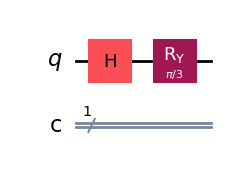

In [255]:
from qiskit import QuantumCircuit
import numpy as np
circuito7 = QuantumCircuit(1,1)  
# Aplica diversas portas
circuito7.h(0)  # Hadamard

#Aqui voce pode alterar o rotação no primeiro valor do argumento

circuito7.ry(np.pi/3,0)
display(circuito7.draw('mpl'))

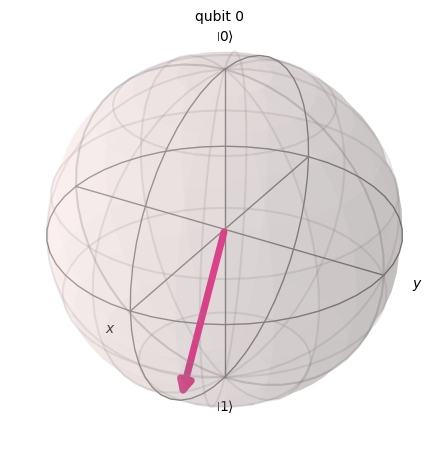

In [256]:
#Coloque seu código aqui
state7 = Statevector(circuito7)
plot_bloch_multivector(state7)

Circuito:


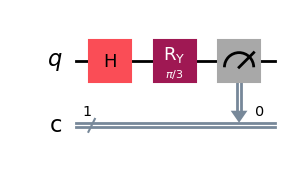

In [257]:
# Medição do qubit 0 no bit clássico 0
circuito7.measure(0, 0)

# Desenho do circuito
print("Circuito:")
display(circuito7.draw('mpl'))

In [258]:
simulator7 = Aer.get_backend('qasm_simulator')
job7 = simulator7.run(circuito7, shots=1000)
counts7 = job7.result().get_counts()
print("Contagens:", counts7)

Contagens: {'1': 930, '0': 70}


**coloque aqui suas conclusões**

A porta RY deslocou o vetor em direção ao polo sul (Estado |1>), dessa forma as medições se deslocaram majoritariamente para o estado |1>, aproximandamente 90% para |1> e 10% para |0>.

<div class="alert alert-success"> <strong> &#x1F4DD; Atividade 8:</strong> Visualize o estado na Esfera de Bloch após a aplicação da porta de rotação RZ. Explique o impacto dessa porta. Em seguida, proceda com a execução do circuito. ATENÇÃO: o código abaixo apenas ilustra circuito quântico. Para executá-lo e analisá-lo, siga as instruções fornecidas anteriormente.

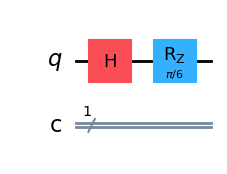

In [259]:
from qiskit import QuantumCircuit
import numpy as np
circuito8 = QuantumCircuit(1,1)  
# Aplica diversas portas
circuito8.h(0)  # Hadamard

#Aqui voce pode alterar o rotação no primeiro valor do argumento

circuito8.rz(np.pi/6,0)
display(circuito8.draw('mpl'))

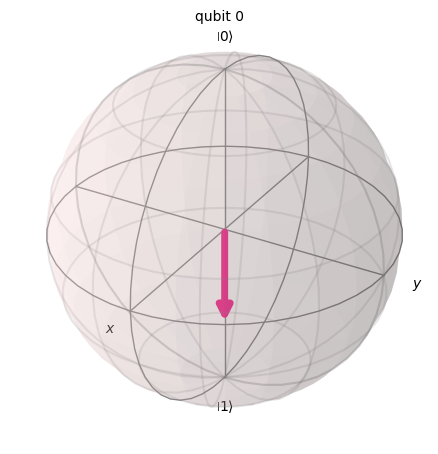

In [260]:
#Coloque seu código aqui
state8 = Statevector(circuito8)
plot_bloch_multivector(state8)

Circuito:


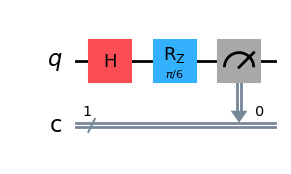

In [261]:
# Medição do qubit 0 no bit clássico 0
circuito8.measure(0, 0)

# Desenho do circuito
print("Circuito:")
display(circuito8.draw('mpl'))

In [262]:
simulator8 = Aer.get_backend('qasm_simulator')
job8 = simulator8.run(circuito8, shots=1000)
counts8 = job8.result().get_counts()
print("Contagens:", counts8)

Contagens: {'1': 490, '0': 510}


A porta RZ deslocou o vetor em direção ao polo sul sobre o eixo Z, porém as medições continuam em aproximadamente 50% para cada estado

**coloque aqui suas conclusões**

https://docs.quantum.ibm.com/api/migration-guides/qiskit-1.0-features